# Homework 1
This homework consists of 2 parts:
* Numpy (5 points)
* Matplotlib (5 points)


The score for each task is described in the comments before the task.

The task is performed independently, otherwise all those involved will receive 0 points :) If you have found a solution to any of the tasks (or part of it) in an open source, you must specify a link to this source in a separate block at the end of your work. Otherwise, **the work will also be rated at 0 points**.

## Part 1. Numpy
It is forbidden to use **while**, **for**, **if** in this part. All operations must be performed in numpy calculation. Recall that using, for example, max instead of np.max is also a suboptimal step. The solution will be counted if it satisfies the conditions above and passes asserts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### Task 1 (1 point)

In [2]:
"""
description: finds the maximum element in the vector among the elements preceded by zero
input: np.array([8, 6, 0, 3])
output: 3
"""
def max_after_zero(x: np.array) -> int:
    zero_indexes = np.where(x == 0)[0]
    after_zero = zero_indexes + 1
    after_zero = after_zero[after_zero < len(x)]
    return(np.max(x[after_zero]))

In [3]:
assert max_after_zero(np.array([0, 1, 2, 0, 6, 0, 10, 0])) == 10
assert max_after_zero(np.array([8, 1, 2, 0, 4, 0, 5])) == 5
assert max_after_zero(np.array([-8, -1, -2, 0, -4, 0, -5])) == -4
print("OK")

OK


### Task 2 (1 point)

In [4]:
"""
description: makes up a block matrix of four
blocks, where each block is a given matrix
"""
def block_matrix(block: np.array) -> np.array:
    return np.block([[block, block], [block, block]])

In [5]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)
print("OK")

OK


### Task 3 (1 point)

In [6]:
"""
description: calculates the product of all
nonzero diagonal elements of a square matrix
"""
def diag_prod(matrix: np.array) -> int:
    diag = np.diag(matrix)
    nonzero_diag = diag[diag != 0]
    return np.prod(nonzero_diag)

In [7]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750
print("OK")

OK


### Task 4 (1 points)

In [8]:
"""
description: this class implements StandardScaler from the sklearn library:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
As input, the fit method accepts a matrix where the features are arranged in
columns, the fit method must remember mean (u) and standard deviation (s) for each of the features,
and the transform must normalize the matrix with the pre-calculated mean and standard deviation.
The transformation : z = (x - u) / s, where x - initial feature value
"""
class StandardScaler:
    def fit(self, X: np.array):
        u = np.mean(X, axis=0)
        s = np.std(X, axis=0)
        self.u = u
        self.s = s

    def transform(self, X: np.array) -> np.array:
        return ((X - self.u)/self.s)

In [9]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
scaler = StandardScaler()

scaler.fit(matrix)

assert np.allclose(
    scaler.transform(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
print("OK")

OK


### Task 5 (1 point)

In [10]:

"""
description: calculates the antiderivative polynomial (take 42 as a constant)
for example, an array of coefficients [6, 0, 1] corresponds to 6x^2 + 1
"""
def antiderivative(coefs: np.array) -> np.array:
    result = np.arange(len(coefs), 0, -1)
    result = coefs/result
    result = np.append(result, 42)
    return result

In [11]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 42.])
)
print("OK")

OK


In [12]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 42.])
)
print("OK")

OK


## Part 2. Matplotlib

Graphs should be readable without having to look into the code:
*   Graph should have a title
*   Subgraphs should have  titles
*   Axes should be labeled
*   Labels should not overlap
*   Font should be readable
*   The colors should be easily distinguishable



### Task 1 (2.5 points)
Generate a Gaussian vector of dimension 2 from 100 points (choose $\mu$ and $\sigma$ on your choice).

In [13]:
vector = np.random.normal(3, 2.5, size=(100, 2)) #mu = 3, sigma = 2.5 for both x, y; there are no correlation between the two axes (i.e. the covariant matrix is diagonal) => two separate vectors for x, y works

Check [the three sigma rule](https://en.wikipedia.org/wiki/68-95-99.7_rule): 99.7% of the values of normal distribution $\in [\mu - 3\sigma; \mu + 3\sigma]$.

Let's visually check this rule for generated 2D data. Draw:



*   The generated data;
*   Point $\mu$ in a separate color;
*   A circle centered in $\mu$ with a radius such that 0.99 of all points fall there;
*   A circle with a radius of 3 sigma;



In [14]:
three_sigma = 3 * 2.5
distences_from_mu = np.linalg.norm(vector - np.array([3, 3]), axis=1)
distances_99 = np.percentile(distences_from_mu, 99)

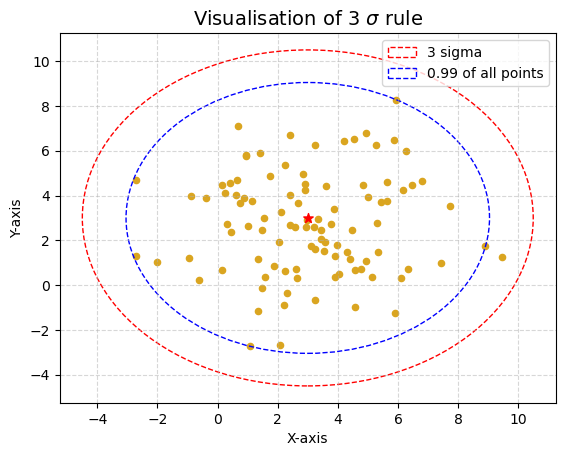

In [15]:
plt.scatter(vector[:, 0], vector[:, 1], color='goldenrod', s=20)
plt.scatter(3, 3, color='red', marker='*', s=50)
circle_three_sigma = plt.Circle((3, 3), three_sigma, color='red', fill=False, linestyle='--', label='3 sigma')
plt.gca().add_patch(circle_three_sigma)
circle_99 = plt.Circle((3, 3), distances_99, color='blue', fill=False, linestyle='--', label='0.99 of all points')
plt.gca().add_patch(circle_99)
plt.title(r'Visualisation of 3 $\sigma$ rule', fontsize=14)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

Possible reference picture:

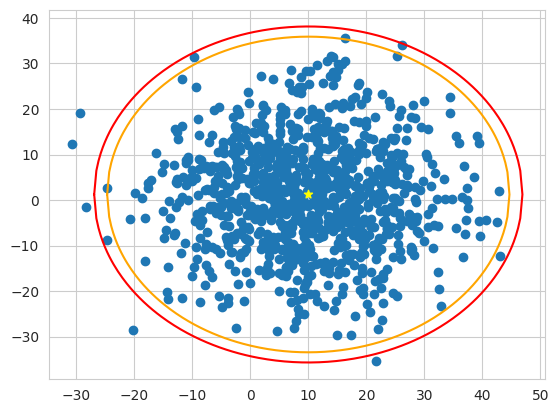

Draw histograms with 10 buckets for each dimension.

**Hint** use `plt.hist2d`

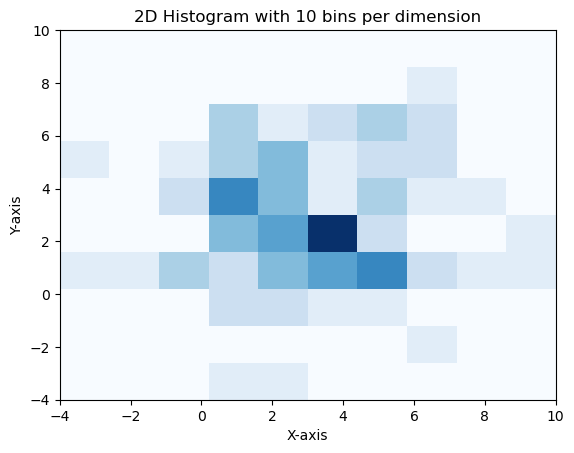

In [16]:
plt.hist2d(vector[:, 0], vector[:, 1], bins=10, cmap='Blues', range=[[-4, 10], [-4, 10]])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Histogram with 10 bins per dimension')
plt.show()

### Task 2 (2.5 points)

Upload the dataset  [fischer's irises](https://ru.wikipedia.org/wiki/Ирисы_Фишера).

In [17]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
X.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
115,6.4,3.2,5.3,2.3
83,6.0,2.7,5.1,1.6
96,5.7,2.9,4.2,1.3


Compute correlation between features

In [18]:
correlations = X.corr()
correlations

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


To make investigating correlation more convenient build a **heatmap** using matplotlib.

Rows and columns should be signed with feature names.  The positive correlation should be displayed in green, the reverse in red, and the absence of correlation in white. Make the plot big enough.

**Hint:** use `plt.xticks`, `plt.yticks`, `plt.imshow`, `plt.colorbar`

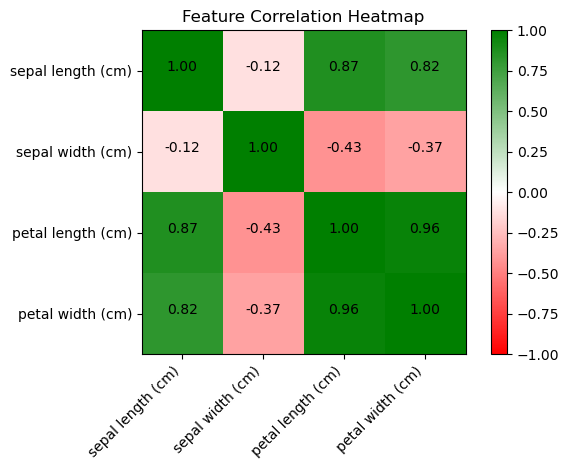

In [19]:
from  matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

im = plt.imshow(correlations, cmap=cmap, vmin=-1, vmax=1)

cbar = plt.colorbar(im)

plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)

for i in range(correlations.shape[0]):
    for j in range(correlations.shape[1]):
        plt.text(j, i, f"{correlations.iloc[i, j]:.2f}", ha='center')

plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

Build the same heatmap using seaborn.heatmap

Text(0.5, 1.0, 'Feature Correlation Heatmap')

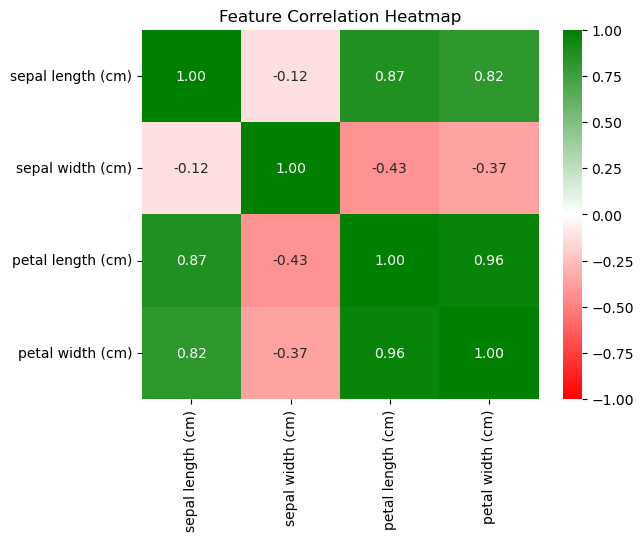

In [20]:
import seaborn as sns

cbar = sns.heatmap(correlations, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt=".2f")
cbar.set_title("Feature Correlation Heatmap")